In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


# Epoch 2: Relations in Data





# Table of Contents

- Why regression? 
- What is regression
- Types of correlation
- A naive approach
- Evaluating our approach
- Getting to the optimal regression line
- Improving our technique
- Working with higher degrees
- Underfitting, Overfitting, Train/Test Split



# Why linear regression?

It's one of the most basic methods for modeling linear data. It's just a line! Almost every other model in machine learning uses as its core some form of linear regression (or properties of linearity) - even the most complex neural networks. 

While it is a simple model, it has a lot of generalizing power - you can extend the line indefinitely to handle points we've never seen before.

![](https://i1.wp.com/erickimphotography.com/blog/wp-content/uploads/2013/10/diagonal.jpg?resize=619%2C415)

A "linear model".

## What is Regression?

The basic idea behind linear regression is to find the **best** line between a set of points. Let's take some data on houses to try to fit a line between them. The goal here is to try to predict the price of a house, for houses we've never seen before.


In [0]:
seismic_risk = np.array([9.3, 8.5, 7.2, 6.8, 5.3, 4.2, 3.7, 2.1, 1.4, 0.7]).reshape(-1, 1)
month_sold = np.array([4, 6, 12, 8, 2, 11, 4, 8, 6, 7]).reshape(-1, 1)
year_sold = np.array([89, 91, 91, 93, 95, 98, 99, 99.5, 100, 102]).reshape(-1, 1)

sale_price = np.array([45, 52, 60, 68, 77, 82, 90, 93, 102, 107])


In machine learning, we call *seismic_risk, month_sold* and *year_sold* **features**, or independent variables, while *sale_price* is called the **label**, or dependent variable.

Features are usually marked with an ***X***, and labels with a ***y***. Let's do this now:

In [0]:
X = np.hstack([seismic_risk, month_sold, year_sold])
X

array([[  9.3,   4. ,  89. ],
       [  8.5,   6. ,  91. ],
       [  7.2,  12. ,  91. ],
       [  6.8,   8. ,  93. ],
       [  5.3,   2. ,  95. ],
       [  4.2,  11. ,  98. ],
       [  3.7,   4. ,  99. ],
       [  2.1,   8. ,  99.5],
       [  1.4,   6. , 100. ],
       [  0.7,   7. , 102. ]])

In [0]:
y = sale_price.reshape(-1, 1)
y

array([[ 45],
       [ 52],
       [ 60],
       [ 68],
       [ 77],
       [ 82],
       [ 90],
       [ 93],
       [102],
       [107]])

And so, ***Linear Regression*** tries to find $w$ and $w'$ such that the line $y' = w\textbf{X} + w'$ is the best fit for the data provided. $\textbf{w}$ is a vector called the *coefficient vector*  or *slope*, and $w'$ is a vector called *the intercept*. 

Ok, now we are ready to do some analysis on the House Prices Mini-Dataset.

# A Naive Approach

Ok, for starters, let's just try to predict the house price using only the *year_sold* feature.

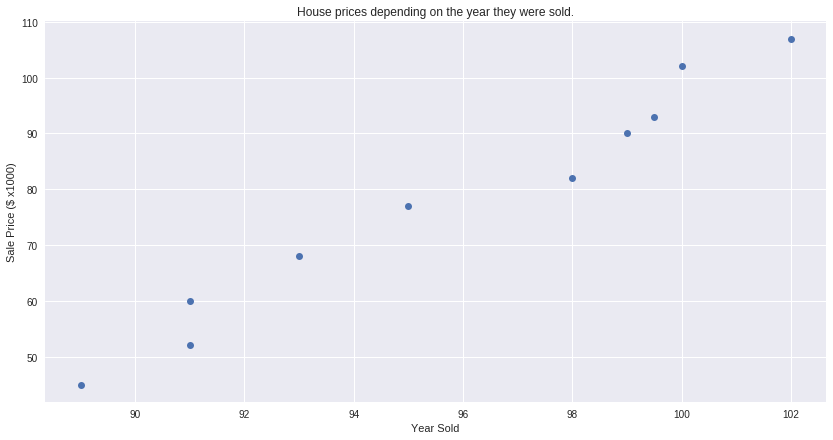

In [0]:
plt.plot(year_sold, sale_price, 'o')
plt.xlabel("Year Sold")
plt.ylabel("Sale Price ($ x1000)")
plt.title("House prices depending on the year they were sold.")
plt.gcf().set_size_inches(14, 7)

## An Intuitive Linear Function

The data is looks linear enough. How should we draw this line?

In [0]:
def plot_line(w, w_, start, end):
  X = np.linspace(start, end, 1000).reshape(-1, 1)
  y = w * X + w_
  
  plt.plot(X, y)

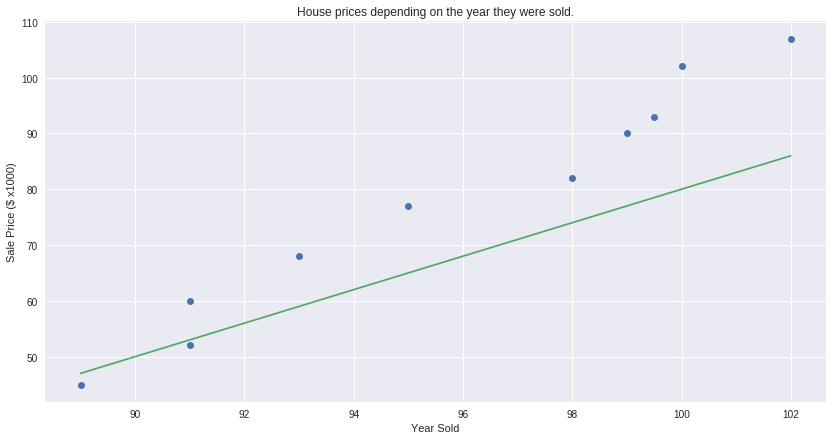

In [0]:

# My guesstimate
w = 3
w_ = -220


plt.plot(year_sold, sale_price, 'o')

plot_line(w, w_, year_sold.min(), year_sold.max())

plt.xlabel("Year Sold")
plt.ylabel("Sale Price ($ x1000)")
plt.title("House prices depending on the year they were sold.")
plt.gcf().set_size_inches(14, 7)

It definitely looks like a line! Though something is a bit off. Why is this not the best line? How do you know that?

## Coding Challenge

Try this yourself! Modify **w** and **w_** so the line better fits the points.

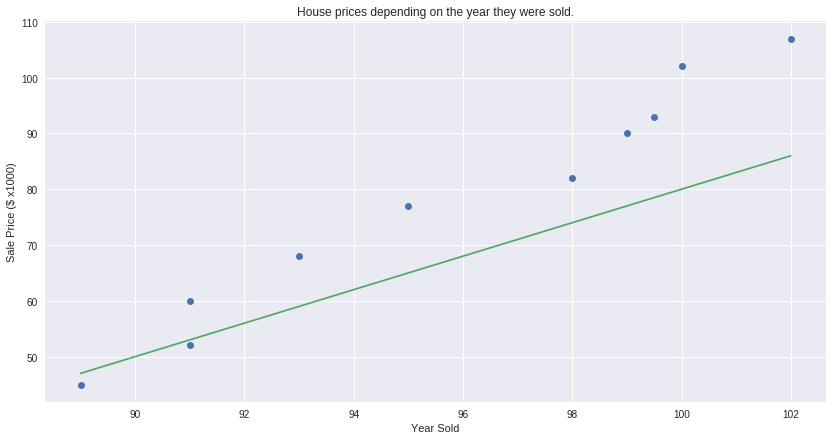

In [0]:
# TODO: modify w and w_ to get a better line. Rerun this cell as many times as you have to.
w = 3
w_ = -220


plt.plot(year_sold, sale_price, 'o')

plot_line(w, w_, year_sold.min(), year_sold.max())

plt.xlabel("Year Sold")
plt.ylabel("Sale Price ($ x1000)")
plt.title("House prices depending on the year they were sold.")
plt.gcf().set_size_inches(14, 7)

## Our Predictions



Let's use the regression line we made to estimate the house prices for the houses we know about.

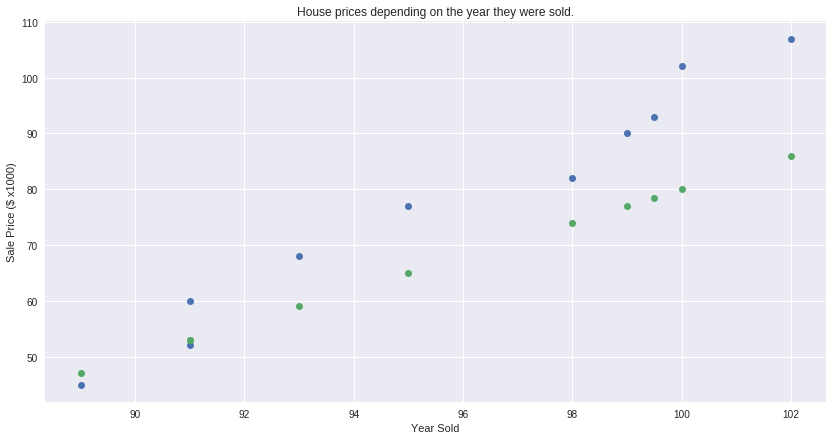

In [0]:
y_ = w * year_sold + w_


plt.plot(year_sold, sale_price, 'o')
plt.plot(year_sold, y_, 'o')

plt.xlabel("Year Sold")
plt.ylabel("Sale Price ($ x1000)")
plt.title("House prices depending on the year they were sold.")
plt.gcf().set_size_inches(14, 7)

Looks almost right. We probabily could do better.


![](https://i.stack.imgur.com/u5HhK.png)

# Evaluating our Approach

## Residuals

The difference between the observed value of the dependent variable (y) and the predicted value (y') is called the [residual](https://en.wikipedia.org/wiki/Errors_and_residuals) (e). We can use the residual plot to further analyze our model, and to understand it better. 

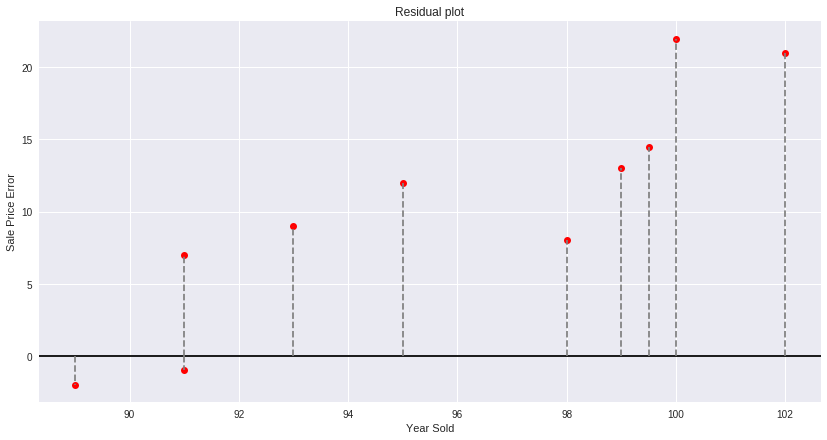

In [0]:
errors = y - y_

plt.plot(year_sold, errors, 'o', c='red')
plt.axhline(0, c='black')

for e, yr in zip(errors, year_sold):
  plt.plot([yr, yr], [0, e], '--', c='gray')

plt.xlabel("Year Sold")
plt.ylabel("Sale Price Error")
plt.title("Residual plot")

plt.gcf().set_size_inches(14, 7)

## Error

We calculated the error simply as:

$$e_i = (y_i - y_i')$$

We could consider a better formula for the error, that actually gives us a number for the whole dataset:

$$ e = \frac{\sum_i(y_i - y_i')^2}{n}$$

This is called the *Mean Squared Error*. The reason it is squared is that we would want to further penalize big errors. We will see that this is actually the loss function for the Linear Regression model. 



## Types of Correlation

We've seen that the lines you chose generally have the same **slope** for *year_sold*. What does that tell us?

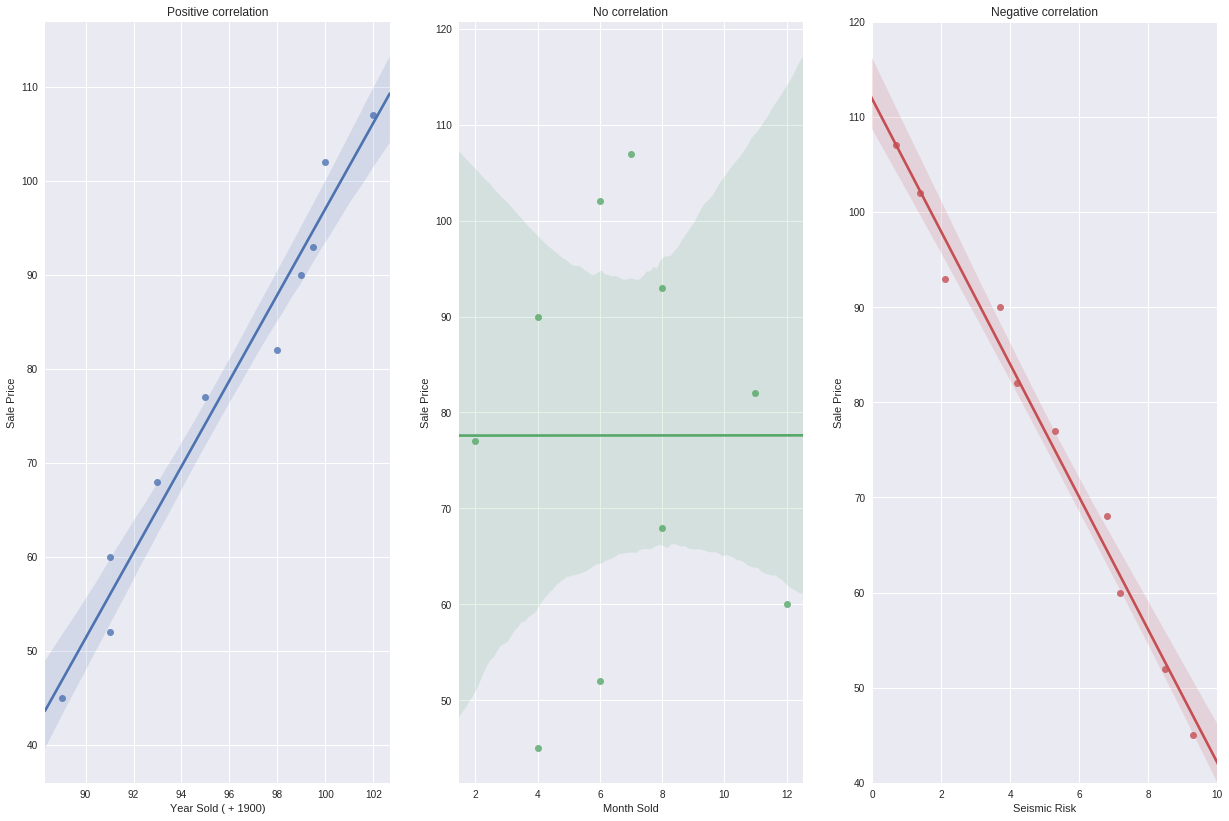

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

sns.regplot(year_sold, sale_price, ax=ax1)
ax1.set_title("Positive correlation")
ax1.set_xlabel("Year Sold ( + 1900)")
ax1.set_ylabel("Sale Price")


sns.regplot(month_sold, sale_price, ax=ax2)
ax2.set_title("No correlation")
ax2.set_xlabel("Month Sold")
ax2.set_ylabel("Sale Price")

sns.regplot(seismic_risk, sale_price, ax=ax3)
ax3.set_title("Negative correlation")
ax3.set_xlabel("Seismic Risk")
ax3.set_ylabel("Sale Price")
ax3.set_xlim(0, 10)
ax3.set_ylim(40, 120)

plt.gcf().set_size_inches(21, 14)

### What is correlation, though?

We see that *positive* slope indicates a positive correlation, *negative* slope indicates a negative correlation, and a slope close to 0 indicates no correlation.

Positive correlation means that if we increase the value of one variable, the other variable increases as well. Similarly, negative correlation means that if we increase the value of one variable, the other variable *decreases* in value.


There's actually a number between -1 and 1 that tells us just how correlated two variables are. That number is called [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

![](http://imgs.xkcd.com/comics/linear_regression.png)


## Coding Challenge

Calculate the pearsonr between every feature and the targets (sale_price = y). Check out the [documentation](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.pearsonr.html) for Pearson's r.

In [0]:
from scipy.stats import pearsonr

# TODO apply pearsonr the features to see how correlated are they with the target.

corr1, _ = pearsonr(year_sold, y)
corr2, _ = pearsonr(month_sold, y)
corr3, _ = pearsonr(seismic_risk, y)

print(corr1, corr2, corr3)



[0.98472113] [0.00033827] [-0.99273222]


# Getting to the Optimal Regression Line

## The Algorithm

Finding the optimal regression line means optimizing the loss function between the predicted values $y'$ and the actual, ground-truth labels, $y$:

$$ loss = \frac{\sum_i(y_i' - y_i) ^ 2}{n}$$

Linear Regression has a *closed form*, which means we don't need to do *gradient descent* (which neural networks will require) - we can calculate the coefficients directly by using these formulas:

$$ w_1 = \frac{\sum_i[(x_i-\bar{x})(y_i-\bar{y})]}{\sum_i(x_i-\bar{x})^2} $$

$$ w_0 = \displaystyle{\frac{1}{n} (\sum_i y_i - w_1 \sum_i x_i)} = \bar{y} - w_1 \bar{x}  $$


Here, $\bar{x}$ and $\bar{y}$ means the average value for $x$ and $y$, respectively. You don't need to worry about this, *sklearn* does this automatically for us! 

### Further reading
- https://machinelearningmastery.com/linear-regression-for-machine-learning/

## Implementation
Let's use sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class to find the best line for our points!

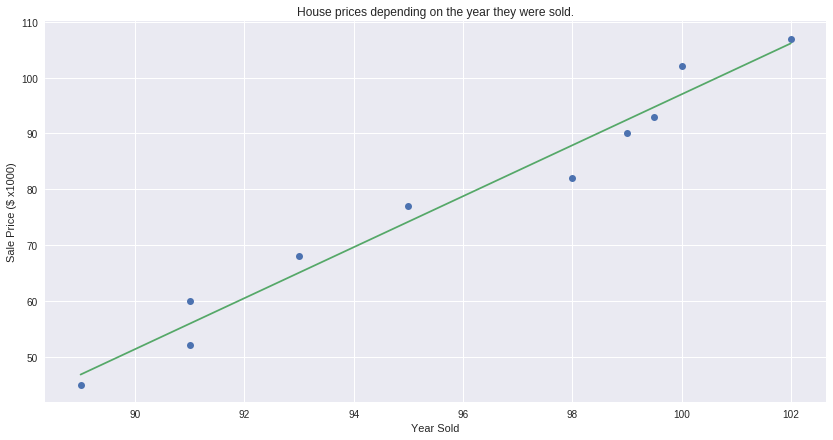

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(year_sold, y)

w = model.coef_[0][0]
w_ = model.intercept_[0]


y_ = w * year_sold + w_

plt.plot(year_sold, sale_price, 'o')

plot_line(w, w_, year_sold.min(), year_sold.max())

plt.xlabel("Year Sold")
plt.ylabel("Sale Price ($ x1000)")
plt.title("House prices depending on the year they were sold.")
plt.gcf().set_size_inches(14, 7)


Now this looks much better! You may have been close. But not ***exactly*** perfect fit, because you didn't optimize the loss function.

How do we know if our data is really linear? That is, how do we know a linear model actually works on our data? sklearn's LinearRegression implements a score() function to give us a number to work with. It's actually [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), which tells us what proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [0]:
model.score(year_sold, y)

0.969675706544191

This is pretty good! 96% of the [variance](https://en.wikipedia.org/wiki/Variance) in our data is explained by our model. Let's get more into the solution space for our problem.

## 2D Solution Space


Minimum error: 2.908056841006738e-28


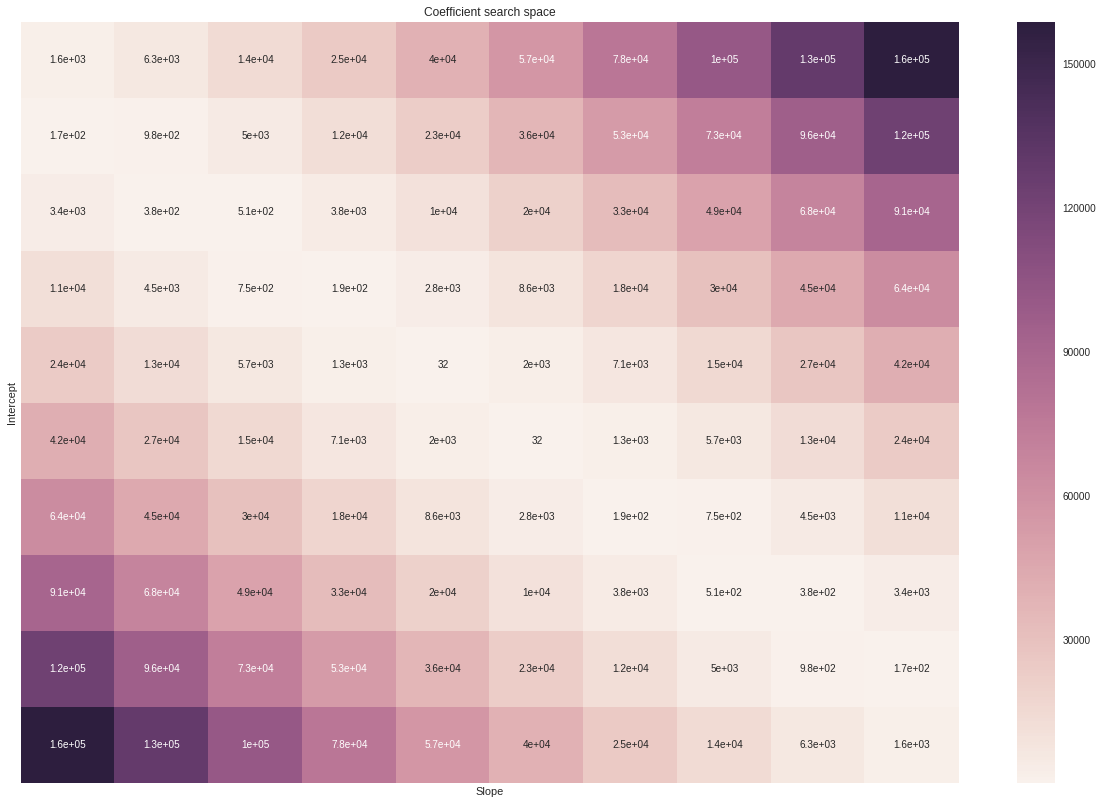

In [0]:

model = LinearRegression()
model.fit(year_sold, y)

w1_ideal = model.coef_[0][0]
w0_ideal = model.intercept_[0]


size = 10
heatmap = []

w1s = np.linspace(w1_ideal / 2, 3 * w1_ideal / 2, size).reshape(-1, 1)

for w1 in w1s:
  w0s = np.linspace(w0_ideal / 2, 3 * w0_ideal / 2, size).reshape(-1, 1)
  
  for w0 in w0s:
    y_ = w1 * year_sold + w0
    error = np.average((y - y_) ** 2)
    heatmap.append(error)
  

w = np.array(heatmap).reshape(size, size)
sns.heatmap(w, annot=True)


plt.gcf().set_size_inches(21, 14)
ax = plt.gca()
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')

ax.set_title("Coefficient search space")

print("Minimum error:", np.average(w1_ideal * year_sold + w0_ideal - y)**2)

We see that it's a strip of "optimal" values for our problem. But only one, at the center, is perfect. But what about the values close to this optimal center? We will se how Ridge and Lasso regularization takes advantage of this to create a more robust model by forcing the slope and intercept to have smaller values.

This is actually a plot of the loss function. It looks like a second degree polynomial - because it is. Check out the **Further reading** section below.


## Further reading

- https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

## Coding Challenge

Try to use sklearn's LinearRegression class to predict the salary of an employee based on the level of seniority. Complete the TODO's below.


In [0]:
seniority = np.linspace(0, 25, 100).reshape(-1, 1)
salary =  (2.5 * np.linspace(20, 64, 100) ** 2 - 100 * np.linspace(20, 64, 100) + np.random.uniform(0, 500, 100) + 1000).reshape(-1, 1)

Text(0.5,1,'Employee Salary Evolution')

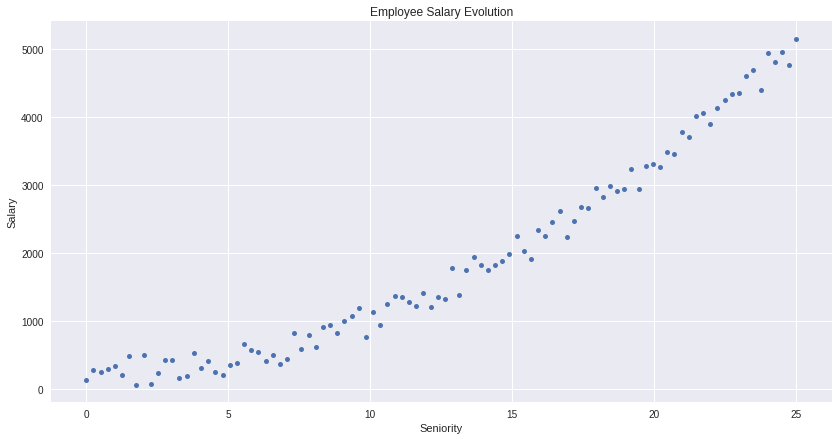

In [0]:
plt.plot(seniority, salary, 'o', markersize=5)

plt.gcf().set_size_inches(14, 7)
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.title("Employee Salary Evolution")

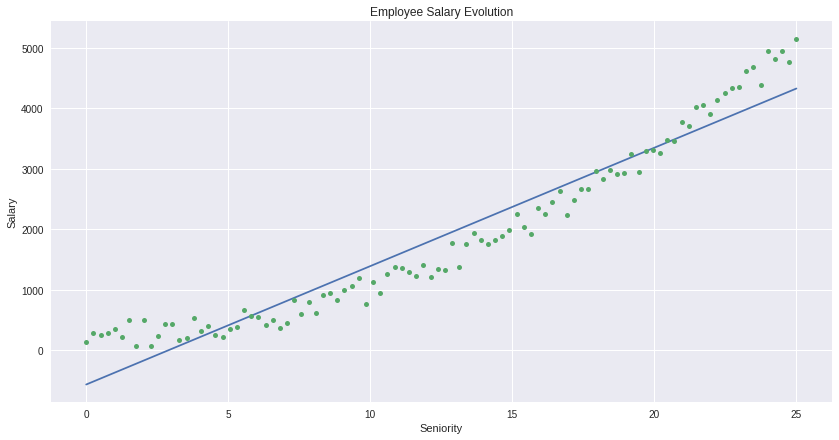

Mean of residuals: 4.865796654485166e-13
0.9302605759712409


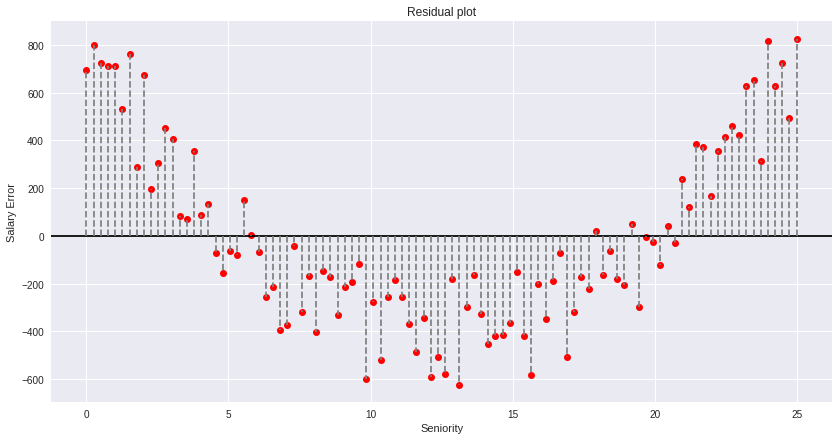

In [0]:
from sklearn.linear_model import LinearRegression


# TODO fit a sklearn LinearRegression on this dataset to predict someone's salary based on the level of seniority. 

model = LinearRegression()
model.fit(seniority, salary)

# TODO Plot the regression line and the residuals. 

plot_line(model.coef_[0][0], model.intercept_, seniority.min(), seniority.max())
plt.plot(seniority, salary, 'o', markersize=5)

plt.gcf().set_size_inches(14, 7)
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.title("Employee Salary Evolution")

plt.show()

errors = salary - model.predict(seniority)
print("Mean of residuals:", np.mean(errors))

plt.plot(seniority, errors, 'o', c='red')
plt.axhline(0, c='black')

for e, yr in zip(errors, seniority):
  plt.plot([yr, yr], [0, e], '--', c='gray')

plt.xlabel("Seniority")
plt.ylabel("Salary Error")
plt.title("Residual plot")

plt.gcf().set_size_inches(14, 7)

# TODO Check the coefficient of determination.

print(model.score(seniority, salary))

# Improving our technique



Looks like our data is not really that linear! Actually, is a second degree polynomial, so **linear** regression won't be that great. There is a way to compute a regression model on this dataset with some clever [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

## Dealing with underfitting

Our model [**underfitted**](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76). Underfitting means that our model is not complex enough to capture the distribution of our data. How can we make our model more complex?

## The Algorithm

We can, in fact, create additional features for this. The easiest way to do this is to just multiply each point by itself. That way we can fit a **polynomial** to our data.

### Note: this is still linear regression - the model is linear in the coefficients, not in the features.

Our 1-d dataset:
$X = \begin{bmatrix}
x_1  \\
x_2  \\
x_3 \\
\vdots  \\
x_n \\
\end{bmatrix}$
becomes, after applying this feature engineering method:


$X_{poly} = \begin{bmatrix}
1 & x_1^1 & x_1^2 \\
1 & x_2^1 & x_2^2 \\
1 & x_3^1 & x_3^2 \\
\vdots & \vdots & \vdots \\
1 & x_n^1 & x_n^2\\
\end{bmatrix}$


Now, we are trying to fit $X_{poly}$ to our targets $y$. Now we'll have 3 weights, one for each degree (previously, we considered the intercept the weight to the 0th degree):

$W = \begin{bmatrix}
w_1  \\
w_2  \\
w_3 \\
\end{bmatrix}$

As such, we have to find $\textbf{W}$, such that the error between the predicted values and the targets is minimal.

$\textbf{X}_{poly}\textbf{W} = \textbf{Y'}$

This is matrix multiplication. The formulas for $\textbf{W}$ are a bit more complicated this time, but fear not! Sklearn has got us covered.

## Loss Function

In this case, we have **multivariate** linear regression, which is basically the same as simple linear regression, but in higher dimmensions. When we have multiple features, we are trying to fit a **hyperplane** that best describes our data.

The loss function is the same, we're just dealing with numbers:

$loss = L(\textbf{W}) = \frac{1}{n} \sum_i(y-y')^2 =(Y- Y')^T(Y-Y')\overset{\mathrm{not}}{=}(Y-Y') ^2$ 

The weights still have a closed form, but it's calculated using matrices:

$W = (X^TX)^{-1}X^TY$

Good luck calculating that by hand.

## Implementation


In [0]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2)

X_poly = transformer.fit_transform(seniority)
X_poly[:20]

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.25252525,  0.063769  ],
       [ 1.        ,  0.50505051,  0.25507601],
       [ 1.        ,  0.75757576,  0.57392103],
       [ 1.        ,  1.01010101,  1.02030405],
       [ 1.        ,  1.26262626,  1.59422508],
       [ 1.        ,  1.51515152,  2.29568411],
       [ 1.        ,  1.76767677,  3.12468115],
       [ 1.        ,  2.02020202,  4.0812162 ],
       [ 1.        ,  2.27272727,  5.16528926],
       [ 1.        ,  2.52525253,  6.37690032],
       [ 1.        ,  2.77777778,  7.71604938],
       [ 1.        ,  3.03030303,  9.18273646],
       [ 1.        ,  3.28282828, 10.77696153],
       [ 1.        ,  3.53535354, 12.49872462],
       [ 1.        ,  3.78787879, 14.34802571],
       [ 1.        ,  4.04040404, 16.32486481],
       [ 1.        ,  4.29292929, 18.42924191],
       [ 1.        ,  4.54545455, 20.66115702],
       [ 1.        ,  4.7979798 , 23.02061014]])

Smooth.

Text(0.5,1,'Employee Salary Evolution')

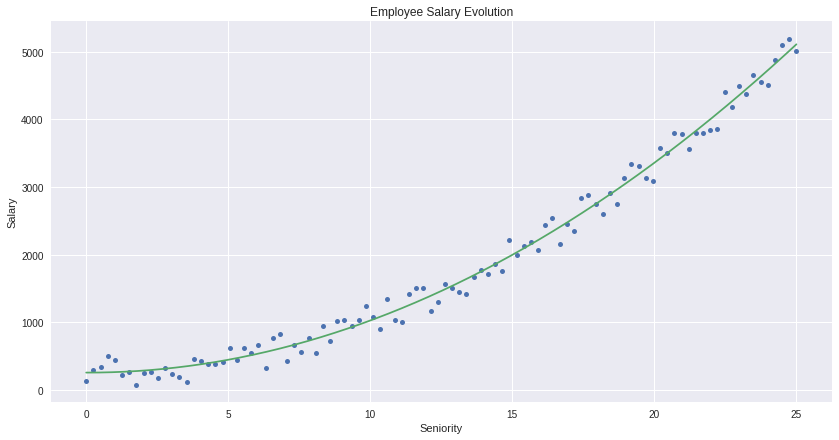

In [0]:
model = LinearRegression()
model.fit(X_poly, salary)

plt.plot(seniority, salary, 'o', markersize=5)


def plot_polynomial(model, degree, start, end):
  X = np.linspace(start, end, 1000).reshape(-1, 1)
  transformed = PolynomialFeatures(degree=degree).fit_transform(X)
  y = model.predict(transformed)
  
  plt.plot(X, y)

plot_polynomial(model, 2, seniority.min(), seniority.max())

plt.gcf().set_size_inches(14, 7)
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.title("Employee Salary Evolution")

Looks much better! Let's see the score:

In [0]:
model.score(X_poly, salary)

0.9899574630886635

The bigger the better amirite?

## Coding Challenge

Go wild. Try to fit polynomials of higher degrees. See what happens.

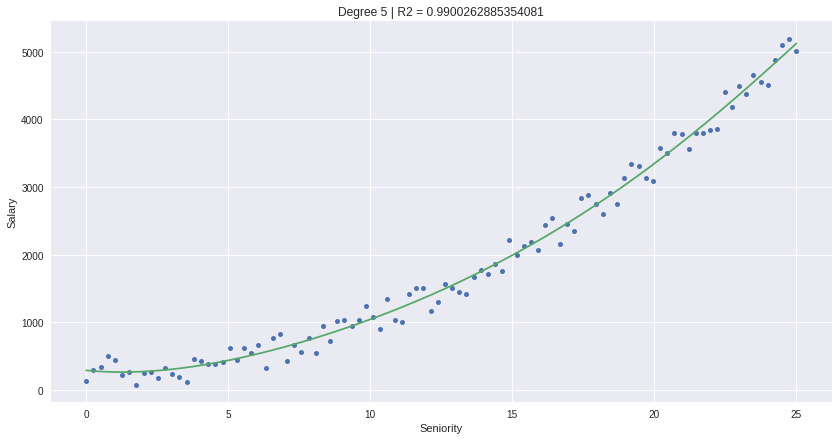

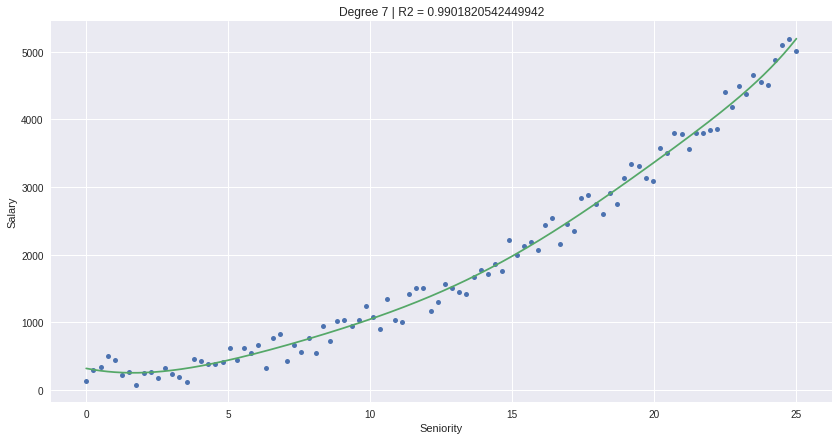

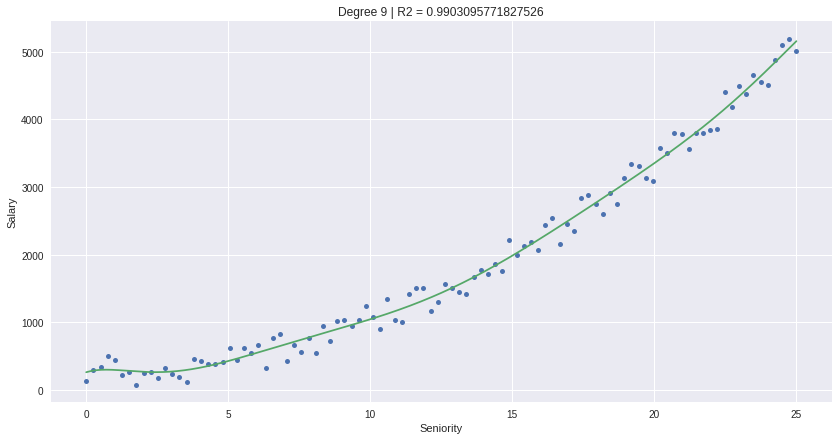

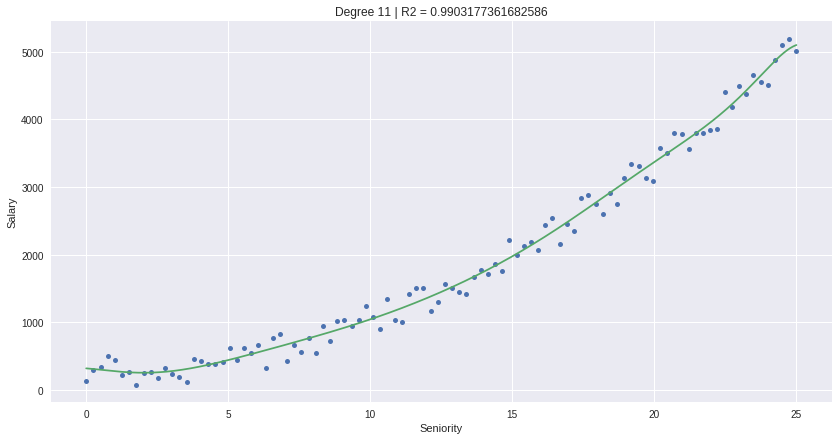

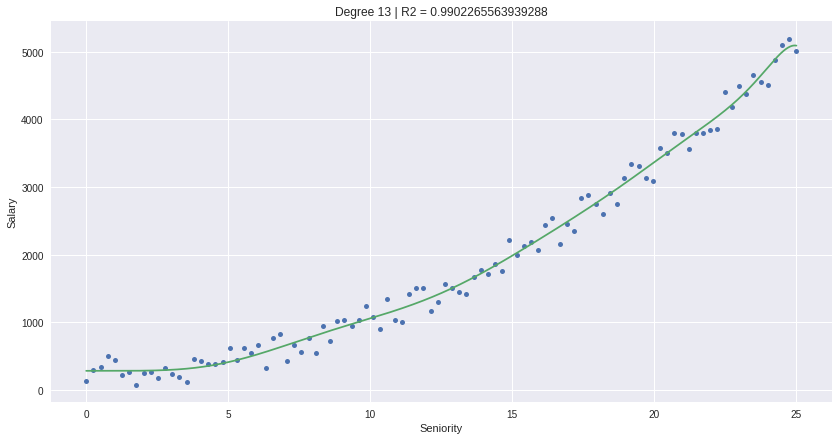

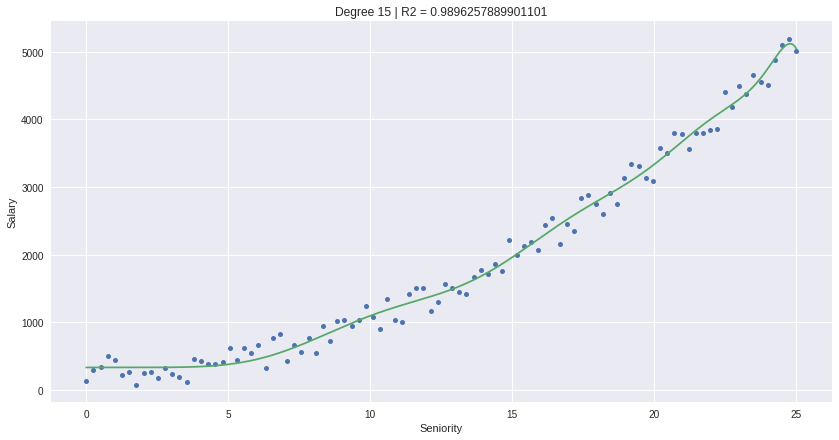

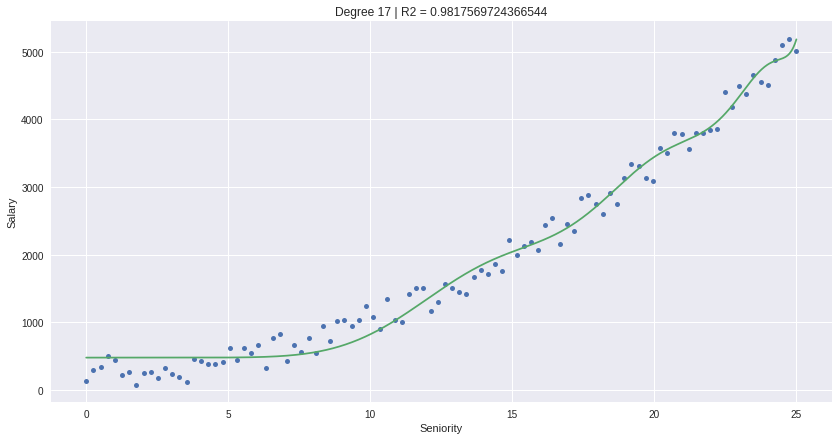

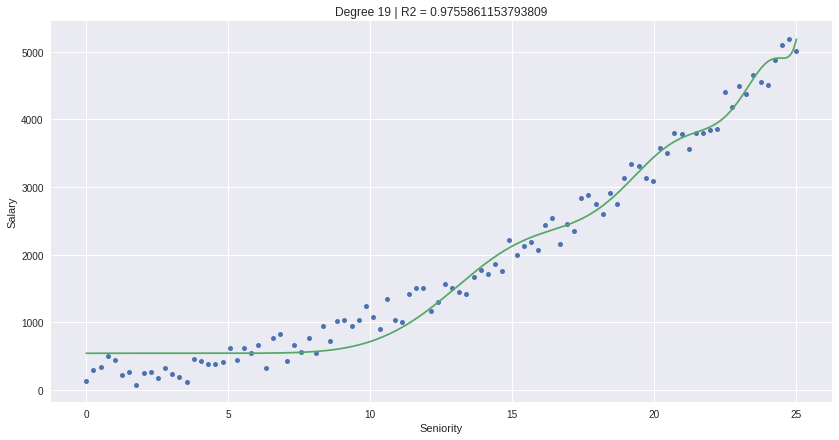

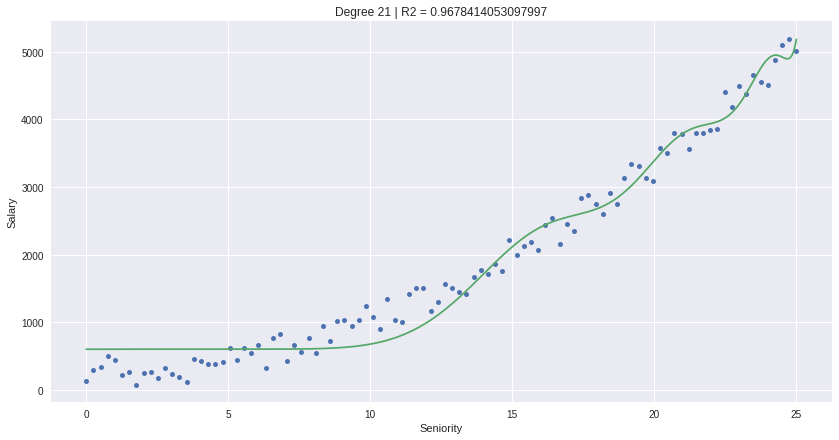

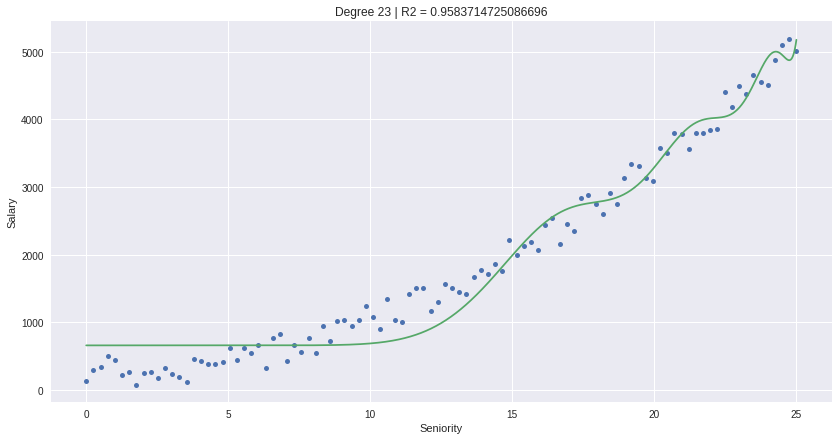

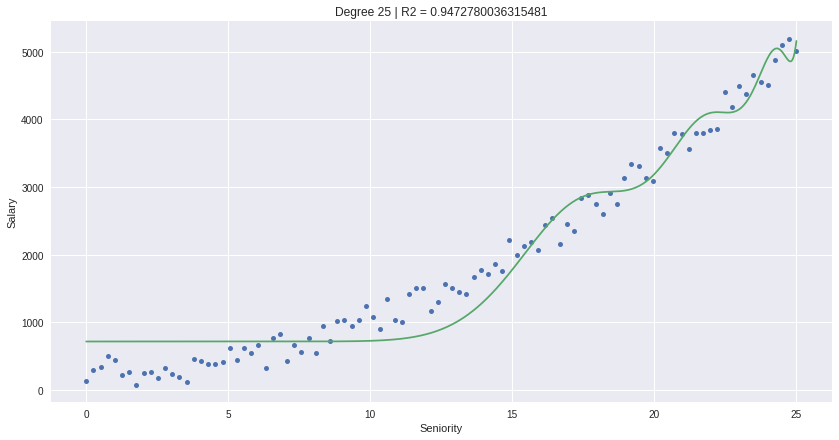

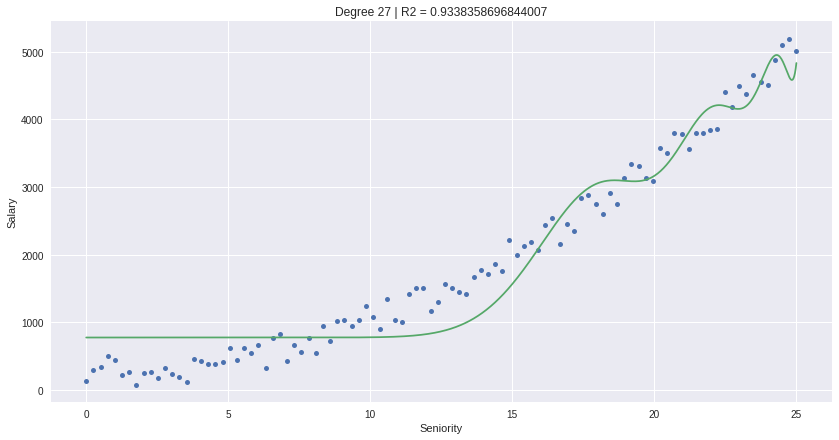

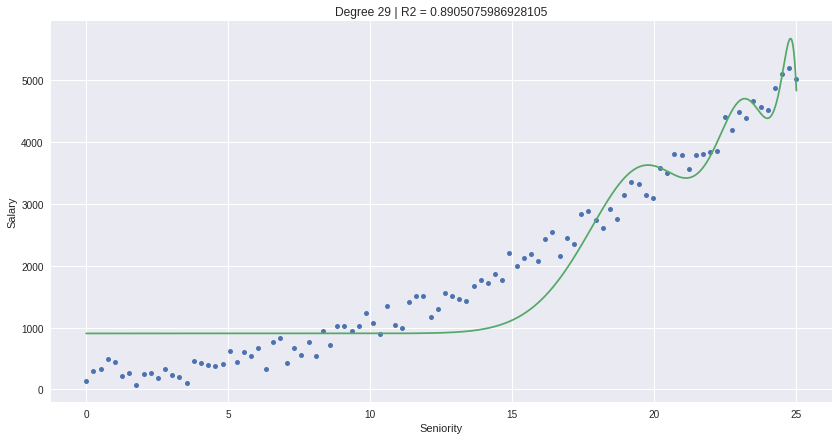

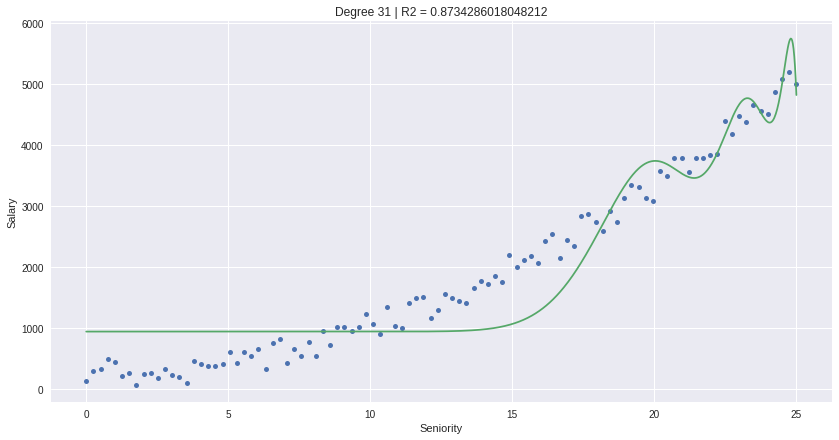

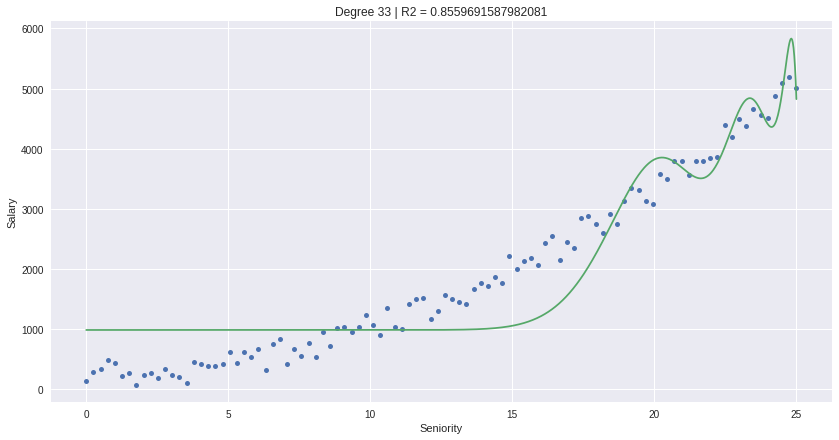

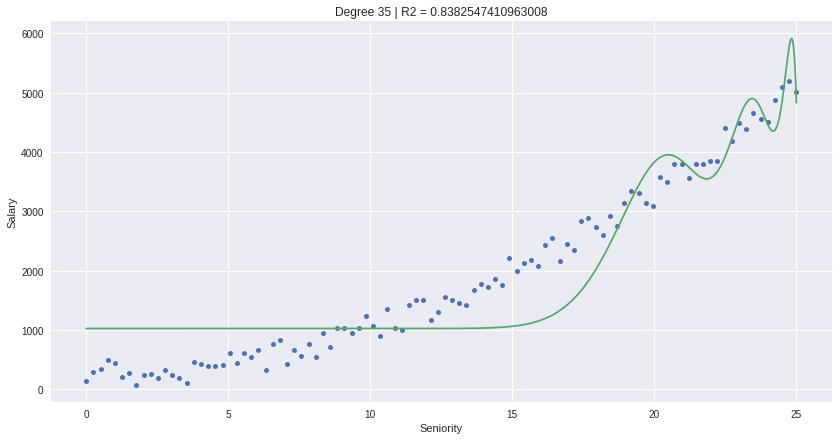

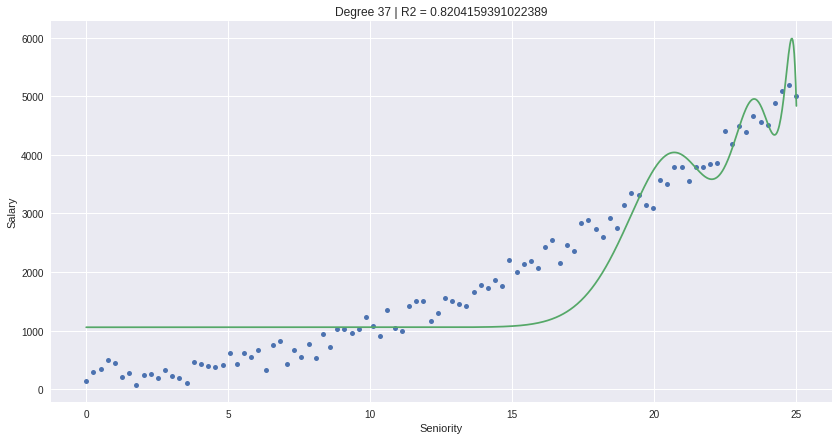

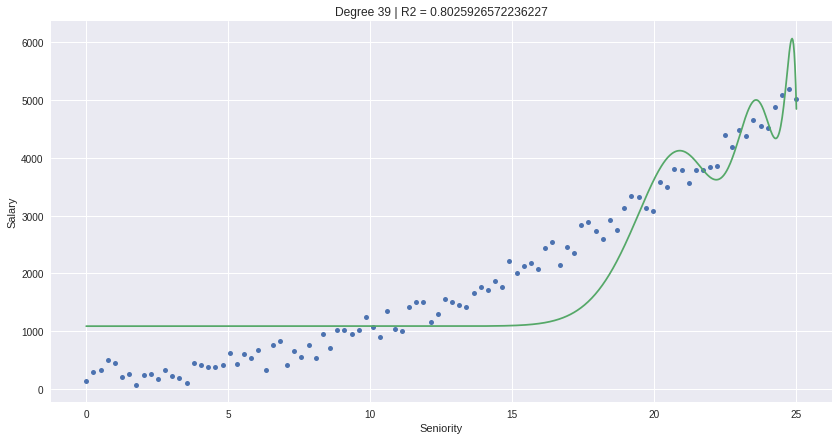

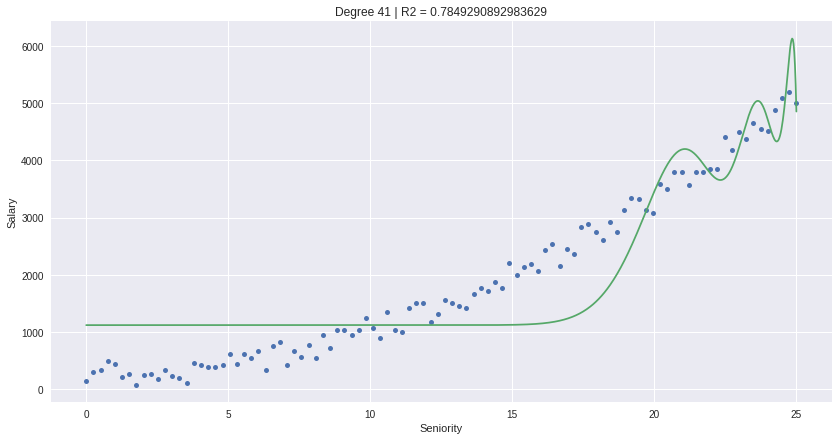

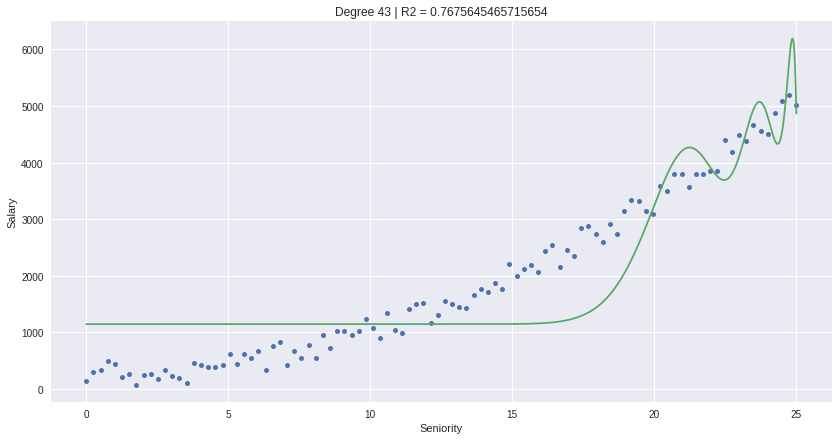

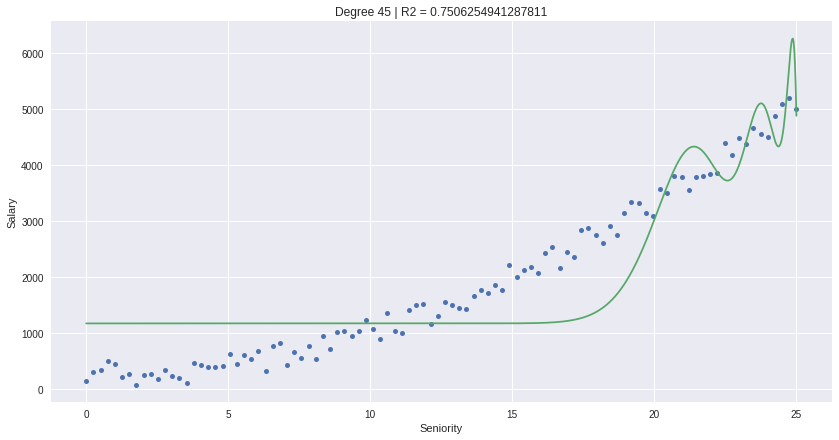

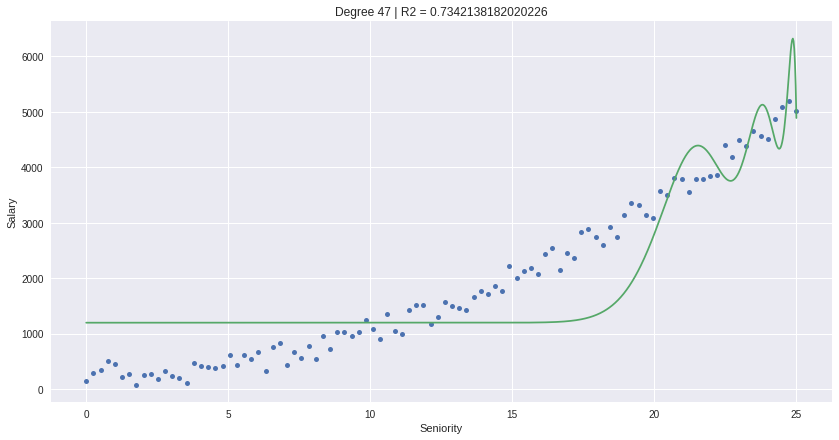

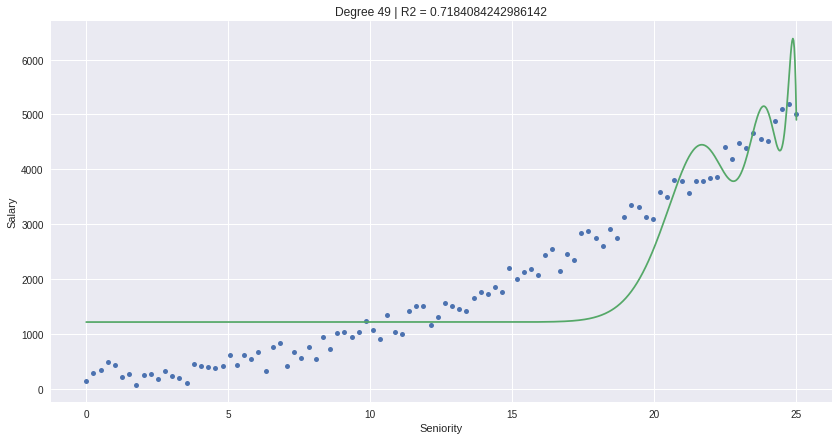

In [0]:
# TODO fit higher degree polynomials and plot the results.


for degree in range(5, 50, 2):
  model = LinearRegression()
  transformer = PolynomialFeatures(degree=degree)

  X_poly = transformer.fit_transform(seniority)
  model.fit(X_poly, salary)

  plt.plot(seniority, salary, 'o', markersize=5)


  def plot_polynomial(model, degree, start, end):
    X = np.linspace(start, end, 1000).reshape(-1, 1)
    transformed = PolynomialFeatures(degree=degree).fit_transform(X)
    y = model.predict(transformed)

    plt.plot(X, y)

  plot_polynomial(model, degree, seniority.min(), seniority.max())

  plt.gcf().set_size_inches(14, 7)
  plt.xlabel("Seniority")
  plt.ylabel("Salary")
  plt.title("Degree " + str(degree) + " | R2 = " + str(model.score(X_poly, salary)))
  plt.show()
  
# TODO check the score for each degree


## Dealing with overfitting

Why is this wrong?

The model [overfitted](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76). Our model si **too** complex for our simple data. But how can we know for sure that this is the case?

Overfiting can be a problem if the **training error** is much smaller than the **validation error**



![](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Overfitting.png?x31195)

We actually scored our model on the training data. Actually, that number tells us very little about the performance of our model. A more realistic measure is the test error.

We can split our data intro training and test via sklearn's *train_test_split()* function.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png =400x)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(seniority, salary, test_size=0.3)

# train on x_train / y_train

features = PolynomialFeatures(degree=50)

x_train_poly = features.fit_transform(x_train)
model.fit(x_train_poly, y_train)

training_error = model.score(x_train_poly, y_train)

# validate on x_test, y_test

test_error = model.score(features.fit_transform(x_test), y_test)


print("Training score", training_error)
print("Test score", test_error)

Training score 0.7812296265246969
Test score 0.3507249454100051


Looks like it's not doing so well this time. Test score is really low. A clear sign of overfitting.


When training models, you should **always** keep some data for testing. This is done so that we can simulate a real world scenario where we don't have a label, and we can't find one.

![](https://scontent.fotp3-2.fna.fbcdn.net/v/t1.0-9/46742229_2149103865102836_4451942479448506368_n.jpg?_nc_cat=111&_nc_ht=scontent.fotp3-2.fna&oh=5abdaeff54b8986b128a076f7f1079a6&oe=5C6696FB =400x)

## K-Fold Cross Validation

![](https://www.researchgate.net/profile/Juan_Buhagiar2/publication/322509110/figure/fig1/AS:583173118664704@1516050714606/An-example-of-a-10-fold-cross-validation-cro17.png)


When we don't have enough data and / or we want a more robust evaluation of our model, we can us K-Fold Cross validation. We split our data into k equal-sized folds, and we train our model k times, each time leaving a fold for testing. The average accuracy of the folds is the final accuracy of the model.



### Further reading
- https://machinelearningmastery.com/k-fold-cross-validation/

In [0]:
from sklearn.model_selection import KFold

X = np.array([1, 2, 3, 4])
y = np.array([10, 20, 30, 40]).reshape(-1, 1)

print(X)
print(y)

kf = KFold(n_splits=4)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


[1 2 3 4]
[[10]
 [20]
 [30]
 [40]]
TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


## Ridge and Lasso Regression

Sound fancy. It isn't. 

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) regression are regularization techniques for limiting the size of the weights in the model. Why are we interested in that? Smaller weights means that the model is robust to small changes in the data. It's a method for preventing overfitting for more complex models. Lasso can make some weights to be exactly 0.

Ridge regression uses [L2 regularization](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c) on the loss function, while Lasso uses L1.


Both have a parameter $\alpha \gt 0$ for controlling the power of regularization. 

### Ridge Loss function

$loss = L_{ridge}(w) = \frac{1}{n}\sum_i(y' - y)^2 + \alpha(\Vert w_0\Vert^2 + \Vert w_1\Vert^2)$

### Lasso Loss function

$loss = L_{lasso}(w) = \frac{1}{n}\sum_i(y' - y)^2 + \alpha(\Vert w_0\Vert + \Vert w_1\Vert)$


The added terms force the weights to be smaller.


## Further Reading
You can read more about these regularizations techniques here:
- http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf
- https://courses.cs.washington.edu/courses/cse446/17wi/slides/ridgeregression.pdf
- https://courses.cs.washington.edu/courses/cse599c1/13wi/slides/LARS-fusedlasso.pdf


![](https://i.stack.imgur.com/BBRXC.png)

## Coding Challenge

Use Ridge and Lasso to fit a higher degree polynomial on the data. Careful for overfitting!

0.35919021888010494
0.9860263081540898


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


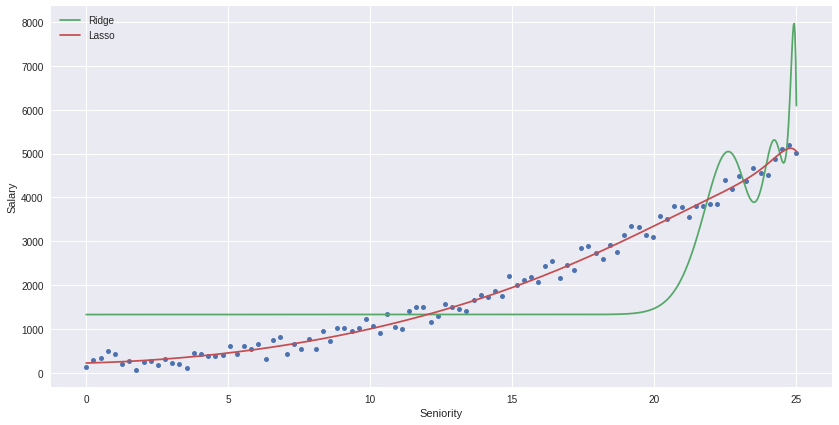

In [0]:
from sklearn.linear_model import Ridge, Lasso



# TODO train Ridge and Lasso Regression on polynomial features
# Hint: check the documentation
# Hint: use train_test_split

degree=70
transformer = PolynomialFeatures(degree=degree)


X_poly = transformer.fit_transform(seniority)

x_train, x_test, y_train, y_test = train_test_split(X_poly, salary) 


# TODO tweak the alpha parameter and see what happens


ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
print(ridge_model.score(x_test, y_test))


lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
print(lasso_model.score(x_test, y_test))

plt.plot(seniority, salary, 'o', markersize=5)


# TODO plot the fitted polynomials

def plot_polynomial(model, degree, start, end):
  X = np.linspace(start, end, 1000).reshape(-1, 1)
  transformed = PolynomialFeatures(degree=degree).fit_transform(X)
  y = model.predict(transformed)

  plt.plot(X, y, label=model.__class__.__name__)

plot_polynomial(ridge_model, degree, seniority.min(), seniority.max())
plot_polynomial(lasso_model, degree, seniority.min(), seniority.max())

plt.gcf().set_size_inches(14, 7)
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.gca().legend()
plt.show()



# BONUS: evaluate your model using K-fold cross validation

# Coding Challenges: Multivariate Linear Regression

# Moore 

In [0]:
from urllib.request import urlopen
file = urlopen('https://raw.githubusercontent.com/wallento/mooreandmore/master/raw_data.csv')
data = pd.read_csv(file, delimiter=';', usecols=['Year', 'Transistors'])

data.head(5)

,Year,Transistors
0,1971,2300
1,1974,4500
2,1976,6500
3,1978,29000
4,1979,29000


# World Happiness Report

In [0]:
from urllib.request import urlopen
file = urlopen('https://raw.githubusercontent.com/bucharestschoolofai/epoch_2/master/2017.csv')
data = pd.read_csv(file, usecols=['Happiness.Score', 'Freedom', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.'])

data.head(5)

,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom
0,7.537,1.616463,0.796667,0.635423
1,7.522,1.482383,0.792566,0.626007
2,7.504,1.480633,0.833552,0.627163
3,7.494,1.564980,0.858131,0.620071
4,7.469,1.443572,0.809158,0.617951


# Facebook

In [0]:
from urllib.request import urlopen
file = urlopen('https://raw.githubusercontent.com/bucharestschoolofai/epoch_2/master/dataset_Facebook.csv')
data = pd.read_csv(file, delimiter=';', usecols=['Total Interactions', 'Post Month', 'Post Weekday', 'Post Hour', 'Page total likes'])

data.head(5)

,Page total likes,Post Month,Post Weekday,Post Hour,Total Interactions
0,139441,12,4,3,100
1,139441,12,3,10,164
2,139441,12,3,3,80
3,139441,12,2,10,1777
4,139441,12,2,3,393


![](https://imgs.xkcd.com/comics/correlation.png)